In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import sklearn
from sklearn.linear_model import LogisticRegressionCV,LinearRegression
from sklearn.linear_model.coordinate_descent import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False
## 拦截异常
warnings.filterwarnings(action = 'ignore', category=ConvergenceWarning)

In [3]:
## 数据读取并处理异常数据
path = "datas/breast-cancer-wisconsin.data"
names = ['id','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape',
         'Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei',
        'Bland Chromatin','Normal Nucleoli','Mitoses','Class']

df = pd.read_csv(path, header=None,names=names)

datas = df.replace('?', np.nan).dropna(how = 'any') # 只要有列为空，就进行删除操作
datas.head(10) ## 显示一下

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [4]:
#1数据提取以及数据分隔
X = datas[names[1:10]]
Y = datas[names[10]]
#分隔
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=0)

In [13]:
#2 数据格式化  --注意只针对连续型数据
ss = StandardScaler()
X_train = ss.fit_transform(X_train) ##训练模型及归一化数据

In [26]:
# 3. 模型构建及训练
## penalty: 过拟合解决参数,l1或者l2

## solver: 参数优化方式
### 当penalty为l1的时候，参数只能是：liblinear(坐标轴下降法)；
### nlbfgs和cg都是关于目标函数的二阶泰勒展开
### 当penalty为l2的时候，参数可以是：lbfgs(拟牛顿法)、newton-cg(牛顿法变种)，seg(minibatch)
# 维度<10000时，lbfgs   维度>10000时， cg法比较好，显卡计算的时候，lbfgs和cg都比seg快
## multi_class: 分类方式参数；参数可选: ovr(默认)、multinomial；这两种方式在二元分类问题中，效果是一样的；在多元分类问题中，效果不一样
### ovr: one-vs-rest：1对多， 对于多元分类的问题，先将其看做二元分类，分类完成后，再迭代对其中一类继续进行二元分类
### multinomial: many-vs-many（MVM）,对于多元分类问题，如果模型有T类，我们每次在所有的T类样本里面选择两类样本出来，
#### 不妨记为T1类和T2类，把所有的输出为T1和T2的样本放在一起，把T1作为正例，T2作为负例，
#### 进行二元逻辑回归，得到模型参数。我们一共需要T(T-1)/2次分类

## class_weight: 特征权重参数
lr = LogisticRegressionCV(multi_class='ovr',fit_intercept=True,Cs=np.logspace(-2,2,20),cv=2,penalty='l2',solver='lbfgs',tol=0.01)
re = lr.fit(X_train,Y_train)

In [27]:
#4.模型效果获取
r = re.score(X_train, Y_train)
print('R值（准确率）：',r)
print("稀疏化特征比率：%.2f%%" %(np.mean(lr.coef_.ravel()==0)*100))
print("参数：",re.coef_)
print("截距：",re.intercept_)
print(re.predict_proba(X_test))

R值（准确率）： 0.970684039088
稀疏化特征比率：0.00%
参数： [[ 1.3926311   0.17397478  0.65749877  0.8929026   0.36507062  1.36092964
   0.91444624  0.63198866  0.75459326]]
截距： [-1.02717163]
[[  6.61838068e-06   9.99993382e-01]
 [  3.78575185e-05   9.99962142e-01]
 [  2.44249065e-15   1.00000000e+00]
 [  0.00000000e+00   1.00000000e+00]
 [  1.52850624e-03   9.98471494e-01]
 [  6.67061684e-05   9.99933294e-01]
 [  6.75536843e-07   9.99999324e-01]
 [  0.00000000e+00   1.00000000e+00]
 [  2.43117004e-05   9.99975688e-01]
 [  6.13092842e-04   9.99386907e-01]
 [  0.00000000e+00   1.00000000e+00]
 [  2.00330728e-06   9.99997997e-01]
 [  0.00000000e+00   1.00000000e+00]
 [  3.78575185e-05   9.99962142e-01]
 [  4.65824155e-08   9.99999953e-01]
 [  5.47788703e-10   9.99999999e-01]
 [  0.00000000e+00   1.00000000e+00]
 [  0.00000000e+00   1.00000000e+00]
 [  0.00000000e+00   1.00000000e+00]
 [  6.27260778e-07   9.99999373e-01]
 [  3.78575185e-05   9.99962142e-01]
 [  3.85098865e-06   9.99996149e-01]
 [  1.801891

In [28]:
# 数据预测
## a. 预测数据格式化(归一化)
X_test = ss.transform(X_test) # 使用模型进行归一化操作
## b. 结果数据预测
Y_predict = re.predict(X_test)
print(Y_predict)

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


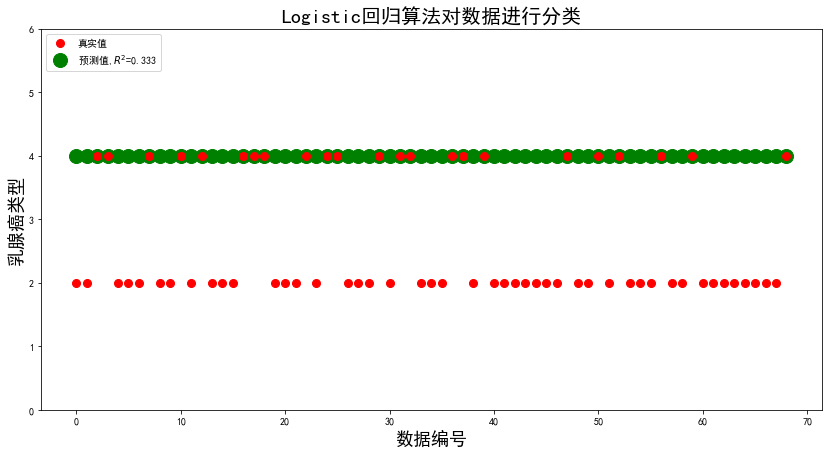

In [29]:
## c. 图表展示
x_len = range(len(X_test))
plt.figure(figsize=(14,7), facecolor='w')
plt.ylim(0,6)
plt.plot(x_len, Y_test, 'ro',markersize = 8, zorder=3, label=u'真实值')
plt.plot(x_len, Y_predict, 'go', markersize = 14, zorder=2, label=u'预测值,$R^2$=%.3f' % re.score(X_test, Y_test))
plt.legend(loc = 'upper left')
plt.xlabel(u'数据编号', fontsize=18)
plt.ylabel(u'乳腺癌类型', fontsize=18)
plt.title(u'Logistic回归算法对数据进行分类', fontsize=20)
plt.show()